**Exploratory Data Analysis (EDA)**

This notebook demonstrates how EDA was done for model training

The first step is to import the libraries for EDA

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next take the data and transform it into a Pandas DataFrame

In [162]:
data = r"C:\Users\leona\Desktop\projetos_github\machine_learning_projects\machine-learning-projects\simple property price forecast\dataset\USA Housing Dataset.csv"
df = pd.read_csv(data)

In [163]:
display(df)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Drop unnecessary columns

In [164]:
df.drop(columns=["date", "statezip", "country"], axis=0, inplace=True)

Now an important step is to analyze the data to understand ownership over it.

In [165]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
dtype: object

In this data we have two columns of objects, the next step is to analyze them

This category is unnecessary, as there are many categories, it is almost 1:1 in relation to the data.

In [166]:
df["street"].value_counts().count()

4079

In [ ]:
df.drop("street", axis=1, inplace=True)

These columns can be very useful, to transform this feature into numeric data, one option is one-hot encoding

43

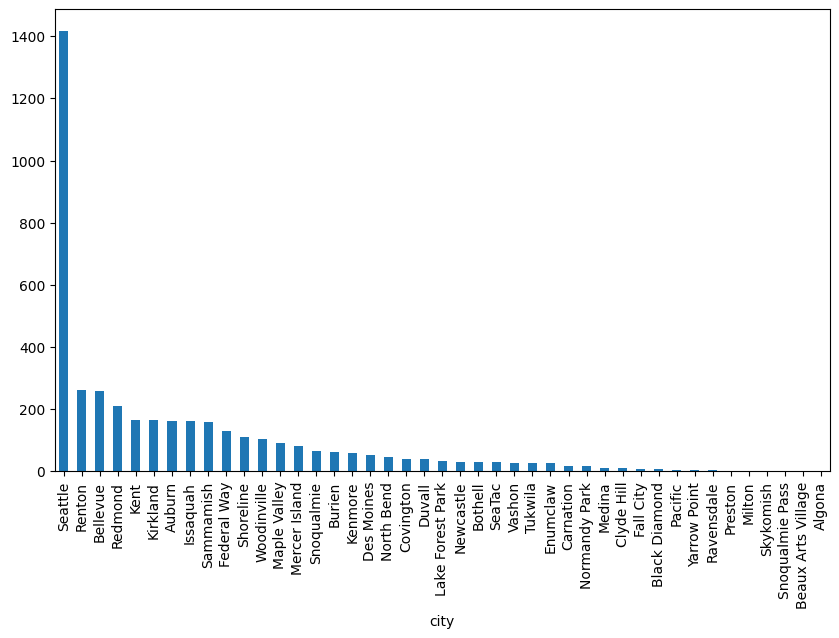

In [167]:
df["city"].value_counts().plot(kind="bar", figsize=(10, 6))
df["city"].value_counts().count()

In [168]:
df.describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
price,4140.000000,553062.877289,583686.452245,0.000000,320000.000000,460000.000000,659125.000000,26590000.000000
bedrooms,4140.000000,3.400483,0.903939,0.000000,3.000000,3.000000,4.000000,8.000000
bathrooms,4140.000000,2.163043,0.784733,0.000000,1.750000,2.250000,2.500000,6.750000
sqft_living,4140.000000,2143.638889,957.481621,370.000000,1470.000000,1980.000000,2620.000000,10040.000000
sqft_lot,4140.000000,14697.638164,35876.838123,638.000000,5000.000000,7676.000000,11000.000000,1074218.000000
floors,4140.000000,1.514130,0.534941,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,4140.000000,0.007488,0.086219,0.000000,0.000000,0.000000,0.000000,1.000000
view,4140.000000,0.246618,0.790619,0.000000,0.000000,0.000000,0.000000,4.000000
condition,4140.000000,3.452415,0.678533,1.000000,3.000000,3.000000,4.000000,5.000000
sqft_above,4140.000000,1831.351449,861.382947,370.000000,1190.000000,1600.000000,2310.000000,8020.000000


The next step is to identify and treat missing values ​​if any.

In [169]:
missing_values = df.isna().sum()/len(df)*100
display(missing_values)

price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
dtype: float64